In [37]:
import pandas as pd
dilutions = ['10x','25x','50x','100x','200x','400x']
dilution = '400x'

df_blank = pd.read_csv(f'data/{dilution}_blank.csv')
df_assay = pd.read_csv(f'data/{dilution}_assay.csv')
df = df_blank.subtract(df_assay)

df.to_csv(f'exp/{dilution}_abs.csv', index=False)

In [38]:
y =pd.DataFrame([[x] for x in [0,0.1175,0.1763,0.235,0.2938,0.3525]])


In [39]:
x = df[['1']].head(6)
x['1'].values.tolist()


[0.05920000000000014,
 0.4220999999999999,
 0.6187,
 0.8285999999999998,
 0.9583999999999999,
 1.0759]

In [40]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x['1'].values.tolist(), y[0].values.tolist())

print("R-squared: %f" % r_value**2)

R-squared: 0.991706


In [41]:
def linear_predict(slope, intercept, x):
    return slope*x+intercept



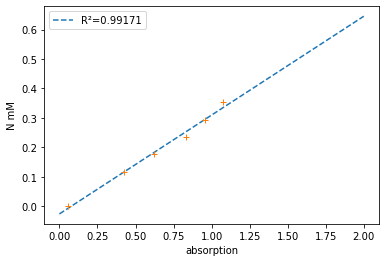

In [42]:
import matplotlib.pyplot as plt
import numpy as np

x_fit = np.linspace(0,2,100)
y_fit = linear_predict(slope=slope, intercept=intercept, x=x_fit)

r2 = r_value**2

label = 'R²={:.5f}'.format(r2)

plt.plot(x_fit, y_fit, '--', label=label)
plt.plot(x, y, '+')
plt.legend(loc='best')
plt.xlabel('absorption')
plt.ylabel('N mM')
plt.show()

In [43]:
df.iloc[:,1:].apply(lambda x: linear_predict(slope=slope, intercept=intercept, x=x)).to_csv(f'exp/{dilution}_conc.csv')

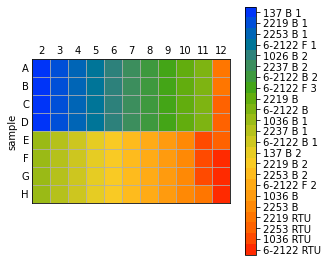

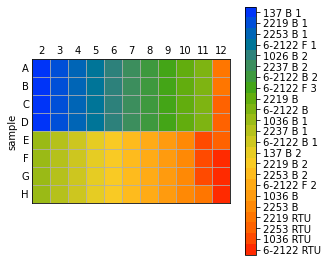

In [44]:
import wellmap
wellmap.show("exp_plate.toml")

In [45]:
dfw = wellmap.load("exp_plate.toml")
dfw


,well,well0,row,col,row_i,col_j,sample
0,A2,A02,A,2,0,1,137 B 1
1,B2,B02,B,2,1,1,137 B 1
2,C2,C02,C,2,2,1,137 B 1
3,D2,D02,D,2,3,1,137 B 1
4,A3,A03,A,3,0,2,2219 B 1
...,...,...,...,...,...,...,...
83,G11,G11,G,11,6,10,1036 RTU
84,F12,F12,F,12,5,11,6-2122 RTU
85,G12,G12,G,12,6,11,6-2122 RTU
86,H12,H12,H,12,7,11,6-2122 RTU


In [46]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0592,0.7810,0.9494,0.8689,0.2508,0.8878,0.7952,0.7510,0.2605,0.3575,0.5959,0.3575
1,0.4221,0.7540,0.7284,0.8630,0.2448,0.8881,0.7014,0.7475,0.2459,0.2657,0.5761,0.3244
2,0.6187,0.7262,0.8237,0.9057,0.2496,0.8767,0.7867,0.6979,0.2482,0.2974,0.5625,0.1908
3,0.8286,0.6706,0.7491,0.8888,0.2705,0.7797,0.7100,0.6856,0.2493,0.6393,0.5667,0.2656
4,0.9584,0.6655,0.6702,0.7194,0.7137,0.7306,0.8119,0.2548,0.7128,0.6800,0.2633,0.2636
5,1.0759,0.6616,0.6478,0.7344,0.7037,0.7403,0.8367,0.2397,0.7686,0.6701,0.2457,0.1993
6,0.0482,0.5632,0.6812,0.6912,0.7120,0.6511,0.9065,0.2334,0.6826,0.6488,0.2405,0.2095
7,0.0521,0.6267,0.7146,0.6394,0.6965,0.7367,0.8765,0.2342,0.6852,0.6658,0.2539,0.2120


In [47]:
dfa = pd.DataFrame({"well":[f"{x}{y}"  for x in 'ABCDEFGH' for y in list(range(1,13))],"abs":[k for i in df.values for k in i]})
dfa['conc'] = dfa['abs'].apply(lambda x: linear_predict(slope=slope, intercept=intercept, x=x))
data = pd.merge(dfa, dfw)
data['dilution'] = dilution
data

,well,abs,conc,well0,row,col,row_i,col_j,sample,dilution
0,A2,0.7810,0.236281,A02,A,2,0,1,137 B 1,400x
1,A3,0.9494,0.292777,A03,A,3,0,2,2219 B 1,400x
2,A4,0.8689,0.265770,A04,A,4,0,3,2253 B 1,400x
3,A5,0.2508,0.058408,A05,A,5,0,4,6-2122 F 1,400x
4,A6,0.8878,0.272111,A06,A,6,0,5,1026 B 2,400x
...,...,...,...,...,...,...,...,...,...,...
83,H8,0.2342,0.052839,H08,H,8,7,7,6-2122 F 2,400x
84,H9,0.6852,0.204142,H09,H,9,7,8,1036 B,400x
85,H10,0.6658,0.197634,H10,H,10,7,9,2253 B,400x
86,H11,0.2539,0.059448,H11,H,11,7,10,2219 RTU,400x


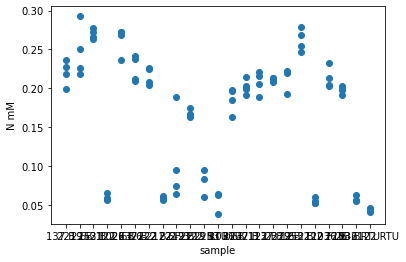

In [48]:
plt.scatter(data['sample'],data['conc'])
plt.xlabel('sample')
plt.ylabel('N mM')
plt.show()
